# Music21: offsets, intervals, rests | Intro to pyplot
This notebook presents new functionalities of music21, regarding the use of offsets for retrieving objects, the creation of and work with interval objects, and retrieval of information about rests. Besides it introduces **pyplot**, a collection of functions from the **Matplotlib** library for the creation of plots.

In this notebook, we will work with the vocal part of our `lsxp-WoBenShi-KongChengJi.xml` score.

In [1]:
from music21 import *

In [2]:
# Path of the folder that contains the score to be loaded
path = './lsxp-WoBenShi-KongChengJi/'

# Name of the score
file_name = 'lsxp-WoBenShi-KongChengJi.xml'

# Join the path of the folder with the file name to get the full path
fn = path + file_name

In [3]:
# Load the score
s = converter.parse(fn)

# Retrieve the vocal part
p_vocal = s.parts[1]

## Using offsets
In notebook 8 we learnt how to retrieve the offset of music21 objects. Now, we will learn the opposite operation, that is, retrieving the object(s) located in a specific offset.

To practice this function let's focus on the first line of the vocal part. It is the line with the lyrics "我本是卧龙岗散淡的人，" which starts in measure 8 and finishes in measure 16. The aim is retrieving this line according to the starting and ending offsets. But first, let's find out which these offsets are.

Since the start and end of this line do not coincide with full measures, we would need to find the offsets of the first and last notes of the line. So, first of all, let's have all the notes of the vocal part in one variable.

In [4]:
nn_vocal = p_vocal.flat.notes.stream()

The first note of the vocal part is precisely the first note of the first line. So the first note of the first line is the note in index `0` in the stream of all the notes of the vocal part. Let's retrieve it, and print its measure number and beat anyway to double check that it is the note we want.

In [5]:
# First note of the vocal part
line_01_first = nn_vocal[0]

# Print measure and beat to verify that we retrieved the correct note
print("Phrase 1 starts at measure {}, beat {}.".format(line_01_first.measureNumber, line_01_first.beat))

Phrase 1 starts at measure 8, beat 3.0.


The last note of the first line is the one with index `56` (I counted it). Let's retrieve it too and also print its measure number and beat to verify that we got the correct one.

In [6]:
# Last note of the vocal part
line_01_last = nn_vocal[56]

# Print measure and beat to verify that we retrieved the correct note
print("Phrase 1 ends at measure {}, beat {}.".format(line_01_last.measureNumber, line_01_last.beat))

Phrase 1 ends at measure 16, beat 2.0.


Now that we have found the first and last note of the first line, we can know in which offsets the first line starts and end.

In [7]:
print("Phrase 1 starts at offset {} and ends at offset {}.".format(line_01_first.offset, line_01_last.offset))

Phrase 1 starts at offset 32.0 and ends at offset 63.0.


So, now we know that the first line starts at offset `32.0` and ends at offset `63.0`.

It is common in computational research to work with annotated data. In the case of music related tasks, annotated datasets usually consist of files of audio or symbolic data (the latter basically are midi files or machine readable scores), accompanied with annotations in different formats of text files (in the case of symbolic data, the annotations might be included in the files). In the particular case of the dataset from which our score is taken, the [Jingju Music Scores Collection](https://zenodo.org/record/1464653), the machine reable scores are accompanied by a spreadsheet containing information about the starting and ending offsets of all the lines and line sections for all the scores of the dataset, including descriptions of the musical features of each line and section. Therefore, you can automatically retrieve from that annoations file all the melodic lines that correspond to the particular musical features you are interested in. So, knowing how to use these annotations is a very useful skill.

In order to retrieve the object(s) located in a specific offset, music21 provides the `.getElementsByOffset()` method, which can be called on the stream from where you want to retrieve objects. Let's use it first with only one parameter, the starting offset of the first line in our score, that is, `32`. We will call it on the `nn_vocal` variable, which contains a stream with all the notes from the vocal part. And as always, the retrieved object(s) will be saved in a stream, which will be assigned to a variable. Finally, let's print the elements contained in the retrieved stream.

In [8]:
# Retrive objects at offset 32 from the stream of notes of the vocal part
offset_32 = nn_vocal.getElementsByOffset(32).stream()

print(offset_32.elements)

(<music21.note.Note G#>, <music21.note.Note B>, <music21.note.Note G#>)


The resulting stream contains three notes, which means that there are three notes on offset `32`. How is that possible? If you look at the score, the first note of the first line has two grace notes. And if you remember, grace notes are located in the same offset as the following main note.

Just to double-check that the method worked, let's print the measure number and beat of the last of these three notes, which is the main note.

In [9]:
print("The main note in offset 32 is in measure {}, beat {}.".format(offset_32[-1].measureNumber, offset_32[-1].beat))

The main note in offset 32 is in measure 8, beat 3.0.


Now, let's do the same for the last note of the first line, in offset `63`.

In [10]:
# Retrive objects at offset 63 from the stream of notes of the vocal part
offset_63 = nn_vocal.getElementsByOffset(63).stream()

print(offset_63.elements)

(<music21.note.Note E>, <music21.note.Note F#>)


Now, we retrieved two notes, because the last note has a grace note. But let's print the measure number and beat of the main note (the second one) to double-check the result.

In [11]:
print("The main note in offset 63 is in measure {}, beat {}.".format(offset_63[-1].measureNumber, offset_63[-1].beat))

The main note in offset 63 is in measure 16, beat 2.0.


So, as you can see, if we input one offset to the `.getElementsByOffset()` method, we can retrieve all the objects positioned at that offset in the stream on which we call the method.

However, we can also input two offsets to the `.getElementsByOffset()` method. In this case, it retrieves all the objects positioned between the first given offset and the second one from the stream on which we call the method. So, if we know that the first line in the vocal part starts at offset `32` and ends at offset `63`, we can call the `.getElementsByOffset()` on the stream where we saved all the notes of the vocal part, giving the starting and ending offsets as parameters. As always, the output will be saved as a stream. To check what we retrieved, let's open it in our score editor.

In [12]:
# Retrive objects between offsets 32 and 63 from the stream of notes of the vocal part
nn_line_01 = nn_vocal.getElementsByOffset(32, 63).stream()

# Print how many notes have been retrieved
print("The first line contains {} notes.".format(len(nn_line_01.elements)))

# Open the line in a score editor
nn_line_01.show()

The first line contains 57 notes.


Since we called the `.getElementsByOffset()` method on a stream of notes, what we retrieved are only notes. However, if we are interested in retrieving the measures that contain the first line, we can also call the `.getElementsByOffset()` method on the vocal part, which is the stream containing the measures.

In [13]:
# Retrive measures between offsets 32 and 63 from the vocal part
mm_line_01 = p_vocal.getElementsByOffset(32, 63).stream()

# Open the line in a score editor
mm_line_01.show()

If you noticed, something didn't work properly. The first measure is missing! Why is that? Let's check the docstrings of this method to see how it works.

In [14]:
p_vocal.getElementsByOffset?

As you can see, the `.getElementsByOffset()` method, as most methods in music21 (and other modules) contains a list of default parameters. Luckily, the names of these parameters are quite self-explanatory. But if they are not clear enough, the docstrings give a good explanation.

In our case, it seems that the problem is the `mustBeginInSpan` parameter. According to the docstrings description, this parameter "determines whether notes or other objects that do not begin in the region but are still sounding at the beginning of the region are excluded." That is, the first line starts at offset `32`, which happens to be in measure 8. But measure 8 does not start in offset `32`, but in offset `30` (two quarter notes earlier). Therefore, since the `mustBeginInSpan` parameter is set to `True` this measure is not retrieved. The solution is simple: call the `.getElementsByOffset()` method by setting the `mustBeginInSpan` parameter to `False`.

In [15]:
# Retrive measures between offsets 32 and 63 from the vocal part
mm_line_01 = p_vocal.getElementsByOffset(32, 63, mustBeginInSpan=False).stream()

# Open the line in a score editor
mm_line_01.show()

And now it's solved! So bear in mind that most music21 methods contain a series of default parameters. So, if something didn't work quite as you expected, just give a look to the docstrings, by calling the method on an appropriate object without parenthesis and followed by question mark `?`.

## Intervals
So far we have been working with objects already present in the score. However, in our analytical work, we might want to work with elements that are not explicitly present in the score, but that we have to create ourselves. A good example of this are intervals. An interval is the distance between two pitches. We can find the pitches in the score, but this distance is something that we measure. In order to work with intervals, music21 has an interval object, that can be easily created from two given pitches or notes (remember that in music21 pitch is an independent object contained in a note).

So, let's create an interval object using the first two notes of the vocal part. First, let's retrieve these notes and print their name with octave to know which interval to expect.

In [16]:
n1 = nn_vocal[0] # First note of the vocal part
n2 = nn_vocal[1] # Second note of the vocal part

# Print notes' name with octave
print("Note 1:", n1.nameWithOctave)
print("Note 2:", n2.nameWithOctave)

Note 1: G#4
Note 2: B4


Now, we can cretate an interval by calling `interval.Interval()` and giving the previous two notes as parameters. We will save the interval object in a variable and just print it out.

In [17]:
itvl_1 = interval.Interval(n1, n2)

print(itvl_1)

<music21.interval.Interval m3>


An interval object is nothing explicit in the score. So, if we try to open it in our score editor, nothing will be shown.

In [18]:
itvl_1.show()

Now that we have created this interval object, we can retrieve a lot of information about it. The next cell shows just some information that can be retrieved from an interval object. Pay attention to the used attributes.

In [19]:
print("Interval name:", itvl_1.name)
print("Interval 'nice' name:", itvl_1.niceName)
print("Interval class:", itvl_1.intervalClass)
print("Interval directed name:", itvl_1.directedName)
print("Interval directed 'nice' name:", itvl_1.directedNiceName)
print("Interval direction:", itvl_1.direction.name)
print("Interval semitones:", itvl_1.semitones)
print("Interval cents:", itvl_1.cents)

Interval name: m3
Interval 'nice' name: Minor Third
Interval class: 3
Interval directed name: m3
Interval directed 'nice' name: Ascending Minor Third
Interval direction: ASCENDING
Interval semitones: 3
Interval cents: 300.0


Now pay attention to the interval's name. It has two parts, a letter and a number. The number refers to the interval's number, and the letter refers to the interval's quality: `m` for minor, `M` for major, `P` for perfect, `A` for augmented, and `d` for diminished. In this case, `m3` represents a minor third.

We can even retrieve the notes that form the interval that we created, by calling the `.noteStart` and `.noteEnd` attributes.

In [20]:
itvl_1_n1 = itvl_1.noteStart  # First note of the interval
itvl_1_n2 = itvl_1.noteEnd    # Second note of the interval

# Print information about the notes
print("This interval starts with {} in measure {}, beat {}.".format(itvl_1_n1.nameWithOctave, itvl_1_n1.measureNumber, itvl_1_n1.beat))
print("This interval ends with {} in measure {}, beat {}.".format(itvl_1_n2.nameWithOctave, itvl_1_n2.measureNumber, itvl_1_n2.beat))

This interval starts with G#4 in measure 8, beat 3.0.
This interval ends with B4 in measure 8, beat 3.0.


Let's now create an interval object for the second and third notes of the vocal part. Since we already have the second note, let's retrieve the third one.

In [21]:
n3 = nn_vocal[2] # Third note of the vocal part

# Print notes' name with octave
print("Note 2:", n2.nameWithOctave)
print("Note 3:", n3.nameWithOctave)

Note 2: B4
Note 3: G#4


Now, let's create the interval object and retrieve information about it.

In [22]:
# Create the interval object
itvl_2 = interval.Interval(n2, n3)

# Print information
print("Interval name:", itvl_2.name)
print("Interval 'nice' name:", itvl_2.niceName)
print("Interval class:", itvl_2.intervalClass)
print("Interval directed name:", itvl_2.directedName)
print("Interval directed 'nice' name:", itvl_2.directedNiceName)
print("Interval direction:", itvl_2.direction.name)
print("Interval semitones:", itvl_2.semitones)
print("Interval cents:", itvl_2.cents)

Interval name: m3
Interval 'nice' name: Minor Third
Interval class: 3
Interval directed name: m-3
Interval directed 'nice' name: Descending Minor Third
Interval direction: DESCENDING
Interval semitones: -3
Interval cents: -300.0


This second interval is also a minor third, but differently from the first one, this is a descending interval. Notice how you can find the direction information from the `.directedName` attribute with the inclusion of a minus sign `-`. Consequently, if the direction of the interval is important for us, we should call the `.directedName` attribute. If not, the `.name` attribute will retrieve the same name for intervals with the same number and quality, regardless of their direction.

Now we are ready to anlyse our score in terms of intervals. For example, let's count how many perfect fourths are present in the vocal line of this score, regardless of its direction. To do that, we will create an interval between each note and the following one. So, we will iterate over the indexes of all the notes, and create an interval between the note in the current index and the note in the following index. Therefore, we need to iterate over all the indexes up to the penultimate one. Since we are not interested in the interval's direction, we will retrieve the name of the interval using the `.name` attribute. If it is a perfect fourth, `P4`, we will update a previously created counter.

To verify that the code is working properly, we will change the color of the notes that form the found perfect fourth intervals, using the `.style.color` attribute, so that we can easily find them in the score when we open it in our score editor.

In [23]:
### Perfect fourths analysis ###

# Initiate a counter
p4_counter = 0

# Iterate over the indexes of the notes until the penultimate one
for i in range(len(nn_vocal)-1):
    # Note in the current index
    n_start = nn_vocal[i]
    # Note in the following index
    n_end = nn_vocal[i+1]
    # Create interval between the previous two notes
    itvl = interval.Interval(n_start, n_end)
    # Check if the name of the interval is a perfect fourth 'P4'
    if itvl.name == 'P4':
        # Update the counter
        p4_counter += 1
        # Change the color of the starting note to green
        itvl.noteStart.style.color = 'green'
        # Change the color of the ending note to red
        itvl.noteEnd.style.color = 'red'

# Print the result
print('The vocal part contains {} perfect fourths.'.format(p4_counter))

# Open the whole vocal part in a score editor
p_vocal.show()

The vocal part contains 32 perfect fourths.


All the found intervals, as it can be seen in the score, are indeed perfect fourths. However, if you look closely, our code has detected perfect fourths in dubious cases, like the one starting with the last note of measure 11, `E4`, and ending with the first note of measure 13, `B3`. The interval between these two notes is indeed a perfect fourth. However, there is a whole empty measure between these two notes (a time during which the instrumental acompaniment plays a melodic filling). So it seems dubious that this case could be considered a valid interval from a perceptual point of view. Therefore, we could discard all cases in which there is a rest between the two candidate notes to form an interval. Consequently, we would need to work with rests.

## Rests
Rests are specific objects in music21, and can be handled as all the other music21 objects. For retrieving rests together with the notes of a stream, instead of the attribute `.notes`, we can use the attribute `.notesAndRests` in the same way as `.notes`. This attribute retrieves all the notes and rests, and only notes and rests, from the stream on which it is called.

So, let's call the `.notesAndRests` attribute on the vocal part, the exact same way as the attribute `.notes` is used. Let's compare how many elements are retrieved from both of these attributes.

In [24]:
# Retrieve notes and rests from vocal part
nr_vocal = p_vocal.flat.notesAndRests.stream()

# Compare length of notes and notes-and-rests
print("The vocal part has {} notes.".format(len(nn_vocal.elements)))
print("The vocal part has {} notes and rests.".format(len(nr_vocal.elements)))

The vocal part has 404 notes.
The vocal part has 541 notes and rests.


Now that we have both notes and rests in the same stream, we might face a problem. If we do our usual iteration over all the elements of a stream with notes and rests, and our loop retrieves the pitch of each element, it will raise an error with the first rest (because rests, obviously, do not contain a pitch object), and the code will stop. Luckily both note and rest objects contain a `.isNote` and `.isRest` attribute which returns `True` if the element on which it is called is respectively a note or a rest.

So, let's take the first element of the stream that contains all the notes and rests of the vocal part. Since we don't know if it is a note or a rest, we will save it in an `x` variable. And we will call the `.isNote` and `.isRest` methods on it.

In [25]:
# First element of the stream with notes and rests
x = nr_vocal[0]

# Check if it is a note
if x.isNote:
    print("The first element of 'nr_vocal' is a note.")
else:
    print("The first element of 'nr_vocal' is NOT a note.")

# Check if it is a rest
if x.isRest:
    print("The first element of 'nr_vocal' is a rest.")
else:
    print("The first element of 'nr_vocal' is NOT a rest.")

The first element of 'nr_vocal' is NOT a note.
The first element of 'nr_vocal' is a rest.


So, the first element of vocal part is a rest. Let's see now what kind of information we can retrieve from a rest.

In [26]:
print('Name:', x.name)
print('Full name:', x.fullName)
print('Duration as quarter length:', x.quarterLength)
print('Dots:', x.duration.dots)

Name: rest
Full name: Half Rest
Duration as quarter length: 2.0
Dots: 0


Let's go back now to our previous task, the analysis of perfect fourths. We will iterate over the indexes of the stream with all notes and rests, and we will create an interval object only if the element in the current index and the one in the next index are both of them notes. The rest of the code, would just be the same.

In [29]:
### Perfect fourths analysis 2.0 ###

# Initiate a counter
p4_counter = 0

# Iterate over the indexes of the notes and rests until the penultimate element
for i in range(len(nr_vocal)-1):
    # Element in the current index
    n_start = nr_vocal[i]
    # Element in the following index
    n_end = nr_vocal[i+1]
    if n_start.isNote and n_end.isNote:
        # Create interval between the previous two notes
        itvl = interval.Interval(n_start, n_end)
        # Check if the name of the interval is a perfect fourth 'P4'
        if itvl.name == 'P4':
            # Update the counter
            p4_counter += 1
            # Change the color of the starting note to green
            itvl.noteStart.style.color = 'green'
            # Change the color of the ending note to red
            itvl.noteEnd.style.color = 'red'

# Print the result
print('The vocal part contains {} perfect fourths.'.format(p4_counter))

# Open the whole vocal part in a score editor
p_vocal.show()

The vocal part contains 27 perfect fourths.


The first version of our code found 32 perfect fourths. This new version finds 27, so it seems that it returns a more precise result. However, if we look at the score, the last note of measure 11 and the first note of measure 13 are respectively colored in green and red, indicating that they respectively are starting and ending notes of an interval. So, why is that? Well, these notes were colored the first time we run the code, and since we didn't modify their color, they are still colored.

We have to keep in mind the permanent changes that our code makes, in case we want to reverse them. We could do two things: coloring all notes back to black, or reload the score. None of the changes we make with our code affect the original file (unless we explicitly program that). Therefore, if we reload a score in the same variable as before, we will get a new "clean" version. So let's do that. Of course, we will need to retrieve the corresponding part and the stream of notes and rests again (otherwise, we will be still using the previous ones).

In [28]:
# Reload the score
s = converter.parse(fn)

# Retrieve vocal part
p_vocal = s.parts[1]

# Retrieve notes and rests
nr_vocal = p_vocal.flat.notesAndRests.stream()

If you run now the cell with the "Perfect fourths analysis 2.0" code, those two notes will be now not colored.

## Introduction to pyplot
Doing science do not only consists in obtaining sound results. An important aspect of doing science is the communication in an effective way of these results. When working with quantitative methods, as the ones that the programming that we are learning allows us to do, a very effective resource for communicating results are plots and charts. [**Matplotlib**](https://matplotlib.org), as it defines itself, "is a comprehensive library for creating static, animated, and interactive visualizations in Python." You can see a series of examples of plots that can be created with **Matplotlib** in the following page: [https://matplotlib.org/gallery/index.html](https://matplotlib.org/gallery/index.html). Within **Matplotlib**, **pyplot** arguably is the most commonly used collection of functions for the creation of plots. In the following cells, an introductory glimpse to **pyplot** is offered.

However, to produce a plot, we need results to be plotted. Let's do a pitch analysis of the vocal part of our score. We will count the aggregated duration of the pitches present in our score and we will plot a bar chart to better interpret the results. Since we don't know *a priori* which pitches are present in the vocal part, we will count them using a dictionary, as it was exemplified in notebook 8. Therefore, the following code is a replica of what was explained there.

In [30]:
# Empty dictionary
pitch_count = {}

# Iterate over all notes and rests
for n in nr_vocal:
    # Check if current element is a note
    if n.isNote:
        # Retrieve pitch name with octave
        n_pitch = n.nameWithOctave
        # Retrieve duration
        n_dur = n.quarterLength
        # Check if the pitch of the current note is NOT yet among the keys of our dictionary
        if n_pitch not in pitch_count.keys():
            # Add this pitch as key with an initial value of the duration of the current note
            pitch_count[n_pitch] = n_dur
        else:
            # Update the value of the current pitch by adding the duration of the current note
            pitch_count[n_pitch] += n_dur

# Print restuls
# Iterate over the dictionary's keys:
for k in pitch_count.keys():
    # Print the key and its value
    print("- {}: {}".format(k, pitch_count[k]))

- G#4: 35.25
- B4: 7.0
- F#4: 43.25
- E4: 40.75
- C#4: 37.75
- B3: 32.25
- G#3: 13.0
- D#4: 12.5
- A3: 0.5
- F#3: 2.5
- A4: 3.0


These are our results. So now let's create a bar chart using **pyplot** to better interpret them.

In order to do that, the first think that we need to do is importing **pyplot**, which is a part of **Matplotlib**. A common convention, suggested in the **Matplotlib** webpage itself, is giving this module an abbreviated name as `plt`. So, the conventional way of importing **pyplot** is like this:

In [31]:
import matplotlib.pyplot as plt

⇒ **Note**: if you don't have **Matplotlib** installed you will get an error. In that case, you just need to install it in the same Anaconda environment from where you are running this notebook. To do that, close the notebook and quit Jupyter, and run, in the corresponding environment, the following command

    conda install matplotlib

Most plots consist in a represantion of a series of values over a bidimensional space, which **pyplot** considers as a Cartesian plane. So, most of **pyplot** graphs requires information about the positions in the horizontal dimension (x axis) and their corresponding values in the vertical dimension (y axis). The horizontal positions and the vertical values can be given as lists to the **pyplot** functions (of course, these two lists have to be of the same length). All **pyplot** graphs are initiated with a first command that indicates the type of graph, and is closed when it is displyed using the `.show()` function (or saved as an image file).

In our case, we want to create a bar chart. So we need to use the `.bar()` function. This will initiate the creation of our plot. To this function, we have to input a list of horizontal positions and a list with their corresponding values to be displayed in the vertical dimension. Luckily, we already have all this information in our `pitch_count` dictionary. The horizontal positions are the found pitches, which are the keys of our dictionary. And these can be retrieved with the `.keys()` method. The values to be displayed in the vertical dimension are the values of the dictionary, which can be retrieved using the `.values()` method. To close and visualize our plot, we just need to call the `.show()` function.

⇒ **Note**: all **pyplot** commands should be preceded by the module's abbreviation `plt`.

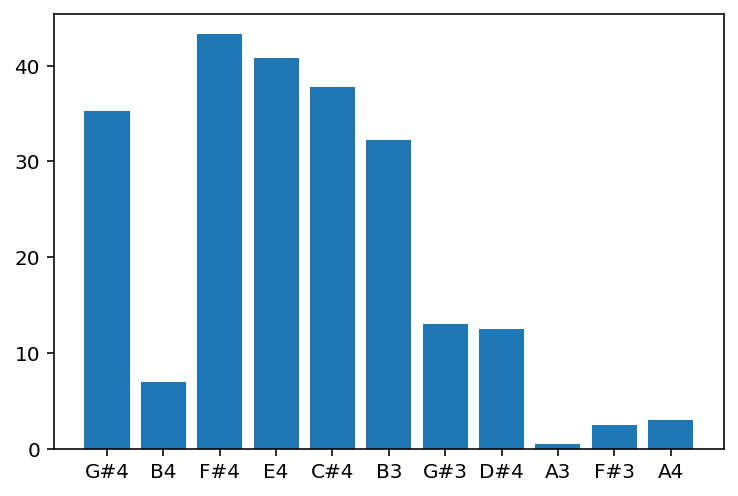

In [32]:
# Initiate the bar chart
plt.bar(pitch_count.keys(), pitch_count.values())
# Close and display the plot
plt.show()

Great! And just with two lines of code! However, the plot is not very intuitive, because the pitches are not organized along the horizontal dimension (x axis). So, let's try to improve our plot.

We can order the keys of our dictionary using the `sorted()` function.

In [33]:
sorted_keys = sorted(pitch_count.keys())

print(sorted_keys)

['A3', 'A4', 'B3', 'B4', 'C#4', 'D#4', 'E4', 'F#3', 'F#4', 'G#3', 'G#4']


Yes, now the pitches are ordered, but since they are strings, they are ordered alphabetically. But we would like to order them in terms of pitch height.

A possible solution for that is using music21 to retrieve a numeric pitch height value for this pitch names. With music21 we can retrieve frequencies in Hertz or midi values. Since midi values are just integers, it would simplify a bit the task. So, having a string with a pitch name, how do hay retrieve its midi value?

To do that, we have to create a pitch object in music21 using that string (this is one example of using pitch as independent from notes). Then, we can retrieve the midi value from this object. Let's test this process first with an example. We know that the midi value of C4 is 60. So let's use this for this example.

In [34]:
# Create a pitch object
myPitch = pitch.Pitch('C4')

# Print the midi value
print("The midi value of C4 is {}.".format(myPitch.midi))

The midi value of C4 is 60.


Great! So now, let's do this for all the pitch names in our `pitch_count` dictionary, that is, for all its keys.

We will use the midi values to order the pitch names. But we do not want to display the midi values in our plot, but the pitch names. So, in order to go back to these names, we will create a dictionary which will have the midi values as keys and the pitch names as values.

In [35]:
# Create empty dictionary
pitch_midi = {}

# Iterate over the keys of the pitch_count dictionary
for pitch_name in pitch_count.keys():
    # Create a pitch object using the current pitch name
    pitch_object = pitch.Pitch(pitch_name)
    # Retrieve the midi value
    midi_value = pitch_object.midi
    # Add the midi value as key in the new dictionary, with the pitch name as value
    pitch_midi[midi_value] = pitch_name

# Print the obtained dictionary    
print(pitch_midi)

{68: 'G#4', 71: 'B4', 66: 'F#4', 64: 'E4', 61: 'C#4', 59: 'B3', 56: 'G#3', 63: 'D#4', 57: 'A3', 54: 'F#3', 69: 'A4'}


Since the midi values, that is, the keys of our `pitch_midi` dictionary, are integers, they can be sorted in an increasing way.

In [36]:
# Sort the midi values, which are the keys of the pitch_midi dictionary
sorted_midi = sorted(pitch_midi.keys())

# Print the results
print(sorted_midi)

[54, 56, 57, 59, 61, 63, 64, 66, 68, 69, 71]


However, we do not want midi values in our plot, but the pitch names. So let's create a list of ordered pitch names using the now sorted midi values and the `pitch_midi` dictionary.

In [37]:
# Empty list for storing the ordered pitch names
sorted_pitch = []

# Iterate over the ordered midi values
for m in sorted_midi:
    # Retrieve the corresponding pitch name from the pitch_midi dictionary, and
    # append it to the sorted_pitch list
    sorted_pitch.append(pitch_midi[m])

# Print the obtained list    
print(sorted_pitch)

['F#3', 'G#3', 'A3', 'B3', 'C#4', 'D#4', 'E4', 'F#4', 'G#4', 'A4', 'B4']


Finally! Now we have the order of pitch names we wanted. Now we are just missing the corresponding ordered list of duration values, which we can retrieve from the first `pitch_count` dictionary, by iterating over the list of ordered pitch names, `sorted_pitch`.

In [38]:
# Empty list for storing the ordered duration values
sorted_values = []

# Iterate over the ordered pitch names
for p in sorted_pitch:
    # Retrieve the corresponding duration value from the pitch_count dictionary, and
    # append it to the sorted_values list
    sorted_values.append(pitch_count[p])

# Print the obtained list
print(sorted_values)

[2.5, 13.0, 0.5, 32.25, 37.75, 12.5, 40.75, 43.25, 35.25, 3.0, 7.0]


So, now we can create our bar chart again, using now the list `sorted_pitch` as parameter for the horizontal dimension (x axis) and the list `sorted_values` as parameter for the verstical dimension (y axis)

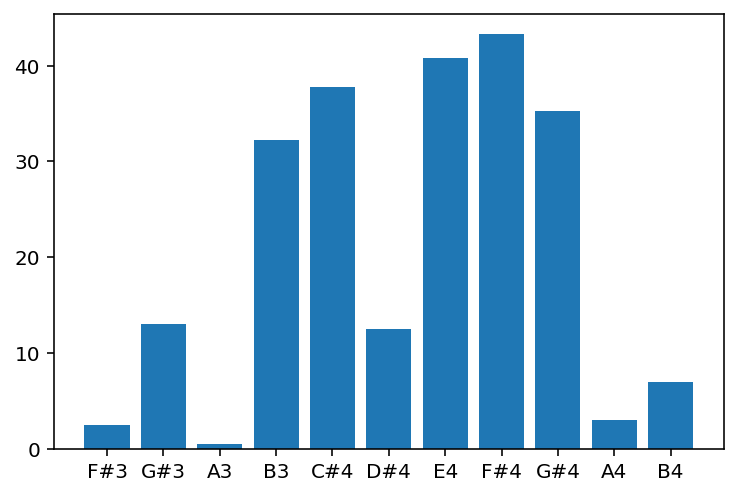

In [39]:
# Initiate the bar chart
plt.bar(sorted_pitch, sorted_values)
# Close and display the plot
plt.show()

This looks much better, and intuitively makes much more sense!

However, we can improve even more this graph, so that pitches are separated according to a distance of tone and semitone between them (that is, the distance between E4 and F#4, which is a tone, should be the double of the distance between D#4 and E4, which is a semitone). The problem is that `sorted_pitch` is just a list of strings, with no numerical information, and **pyplot** displays them just one after the other. However, we do have a sorted list with numerical information: `sorted_midi`. So, let's use this list as the parameter for the horizontal dimension (x axis) and see what happens.

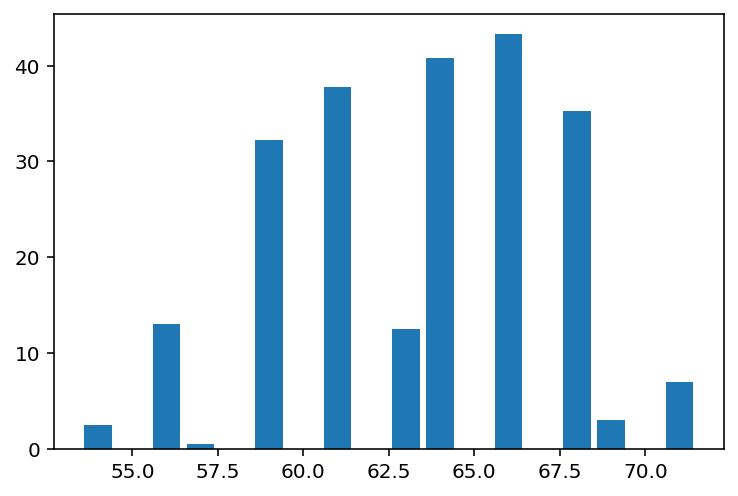

In [40]:
# Initiate the bar chart
plt.bar(sorted_midi, sorted_values)
# Close and display the plot
plt.show()

Now the position of the bars is more meaningful. However, the information in the x axis is midi values, and this is not what we wanted. Even more, **pyplot** considered the x axis as a continuous scale (and, in fact, midi values are a continuous scale) and automatically decided to just show labels at regular steps. Luckily, **pyplot** allows us to keep this distribution over the x axis, and, at the same time, decide for ourselves which labels we want to display along that axis. And the labels we want to display are the ordered pitch names that we have in the `sorted_pitch` list.

To add this modification to the previous plot, we have to understand how **pyplot** creates plots. As previously mentioned, plots are initiated with a command that defines the type of plot and are closed when the `.show()` function is called (or saved to an image file). This means that after closing the plot, no further changes can be made. Therefore, all the changes we want to apply to a plot should be called between the intiation and closing statements. In this case, we will use the `.xticks()` function, for specifying the labels (called "ticks") of the x axis. This function takes two parameters, a list with the positions of the ticks and the list of ticks to be displayed. Since in our plot the x axis is the scale of midi values, we want to display the pitch names in the midi positions to which they correspond, which are saved in the `sorted_midi` list. And the ticks to be displayed are the pitch names themselves, saved in the `sorted_pitch` list.

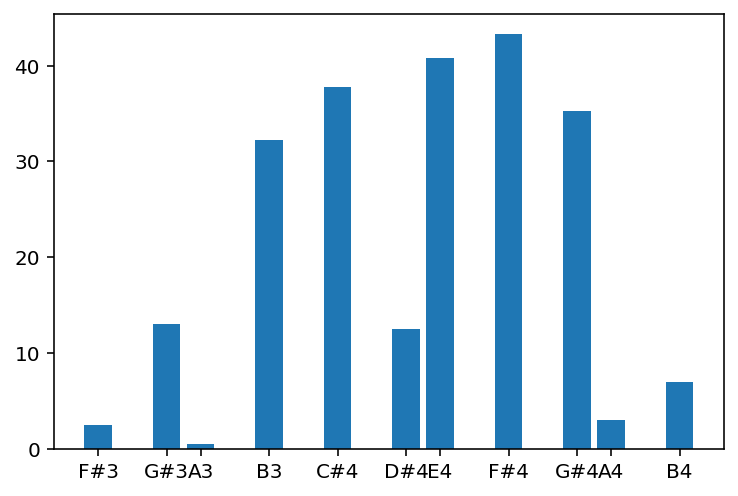

In [41]:
# Initiate the bar chart
plt.bar(sorted_midi, sorted_values)
# Define ticks for the x axis
plt.xticks(sorted_midi, sorted_pitch)
# Close and display the plot
plt.show()

Finally! This plot shows our results in a very intuitive and meaningful way.

The power of **pyplot** is the enourmous versatility that it offers for customizing your plots. The options are endless. The next cell just shows few of them, improving the visual aspect of the plot for its use in a publication. You can find a lot of more options in the [**pyplot** documentation](https://matplotlib.org/contents.html). Besides, its webpage offers a very useful [**pyplot** tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py). 

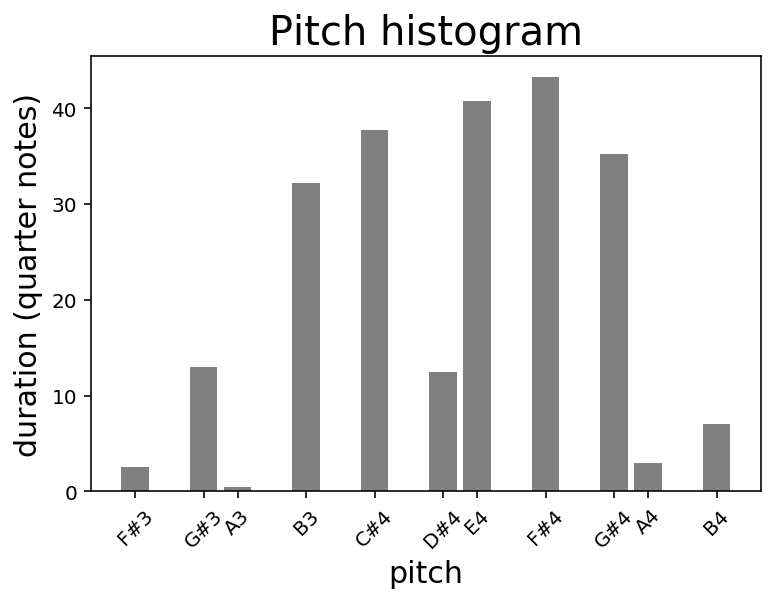

In [42]:
# Initiate the bar chart
plt.bar(sorted_midi, sorted_values, color='gray') # Gray bars for black and white printing

# Define ticks for the x axis
plt.xticks(sorted_midi, sorted_pitch, rotation=45) # Give a 45º rotation to the ticks for clearer display

# Define the title of the plot
plt.title("Pitch histogram", size=20) # Fontsize of 20

# Define a label for the x axis
plt.xlabel("pitch", size=15) # Fontsize of 15

# Define a label for the y axis
plt.ylabel("duration (quarter notes)", size=15)  # Fontsize of 15

# Close and display the plot
plt.show()

## Exercises

### Exercise 1. Debugging

### 1.1

In [45]:
# This cell uses the p_vocal variable previously defined

offset_530 = p_vocal.flat.getElementsByOffset(530).stream()

for e in offset_530.elements:
    print(e)

<music21.meter.TimeSignature 2/4>
<music21.note.Rest rest>


### 1.2

In [47]:
# This cell uses the nn_vocal variable previously defined

n4 = nn_vocal[3]
n5 = nn_vocal[4]

itvl = interval.Interval(n4, n5)

print("Between the fourth and fifth notes of the vocal part there is a", itvl.directedNiceName)

Between the fourth and fifth notes of the vocal part there is a Ascending Perfect Fourth


### 1.3

In [51]:
# This cell uses the nr_vocal variable previously defined

# Counter for major thirds
count_M3 = 0

# Iterate over indexes
for i in range(len(nr_vocal)-1):
    # Current element
    n1 = nr_vocal[i]
    # Next element
    n2 = nr_vocal[i+1]
    # Create interval
    if n1.isNote and n2.isNote:
        itvl = interval.Interval(n1, n2)
    # Check major third
        if itvl.name == 'M3':
        # Update counter
            count_M3 += 1
        
# Print results
print("The vocal part contains {} major thirds.".format(count_M3))

The vocal part contains 8 major thirds.


### 1.4

In [52]:
# This cell uses the nr_vocal variable previously defined

# Counter for minor seconds
count_m2 = 0

# Iterate over indexes
for i in range(len(nr_vocal)-1):
    # Current element
    n1 = nr_vocal[i]
    # Next element
    n2 = nr_vocal[i+1]
    # Check both elements are notes
    if n1.isNote and n2.isNote:
        # Create interval
        itvl = interval.Interval(n1, n2)
        # Check major third
        if itvl.name == 'm2':
            # Update counter
            count_m2 += 1
        
# Print results
print("The vocal part contains {} minor seconds.".format(count_m2))

The vocal part contains 5 minor seconds.


### 1.5
Distribution of the Austrian population according to age.

(Data from [https://www.indexmundi.com/austria/age_structure.html](https://www.indexmundi.com/austria/age_structure.html) for 2019)

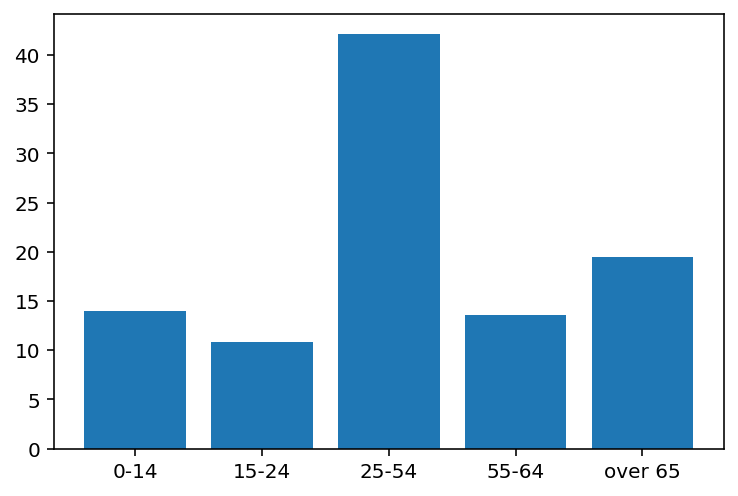

In [53]:
age_range = ['0-14', '15-24', '25-54', '55-64', 'over 65']
population_percentage = [14, 10.82, 42.1, 13.63, 19.44]

plt.bar(age_range, population_percentage)
plt.show()

### Exercise 2. Flawed logic

### 2.1
Count how many notes and rests are present in the transcription of the first line of the vocal part.

Expected result:

    The first line of the vocal part contains 57 notes and 3 rests.

In [56]:
# This cell uses the variables nn_vocal and nr_vocal previously defined

# Retrieve first line
line_1 = nr_vocal.getElementsByOffset(32, 63).stream()

# Counters
count_notes = 0
count_rests = 0

# Iterate over elements 
for e in line_1.elements:
    # Check if it is note
    if e.isNote:
        count_notes += 1
    else:
        count_rests += 1

# Print result
print("The first line of the vocal part contains {} notes and {} rests.".format(count_notes, count_rests))

The first line of the vocal part contains 57 notes and 3 rests.


### 2.2
Previously we analyzed the occurrences of perfect fourths in the vocal part. Let's now count if this interval is more frequent with ascendent or descendent direction.

Expected result:

    Among the perfect fourths in the vocal part, 17 are ascending and 10 are descending.

In [60]:
# This cell uses the variable nr_vocal previously defined

# Counters
p4_asc = 0 # ascending perfect fourths
p4_des = 0 # descending perfect fourths

# Iterate over elements
for i in range(len(nr_vocal)-1):
    n1 = nr_vocal[i]
    n2 = nr_vocal[i+1]
    # Check both elements are notes
    if n1.isNote and n2.isNote:
        # Create interval
        itvl = interval.Interval(n1, n2)
        # Check ascending perfect fourth
        if itvl.directedName == 'P4':
            p4_asc += 1
        # Check descending perfect fourth
        elif itvl.directedName == 'P-4':
            p4_des += 1

# Print results
print("Among the perfect fourths in the vocal part, {} are ascending and {} are descending.".format(p4_asc, p4_des))

Among the perfect fourths in the vocal part, 17 are ascending and 10 are descending.


### 2.3
Let's analyze the intervalic structure of the vocal part. Since we don't know a priori what kind of intervals are pressent in the vocal part, we will count them using a dictionary.

Expected result:

    The distribution of intervals in the vocal part is as follows:
    - m3: 114
    - M2: 167
    - P4: 27
    - P1: 28
    - M3: 8
    - P5: 9
    - m6: 2
    - m2: 5
    - m7: 2
    - M6: 2
    - m10: 1

⇒ **Note**: this exercise follows the same logic as exercises 2.3, 2.4 and 3.5 from notebook 8.

In [61]:
# This cell uses the variable nr_vocal previously defined

# Empty dictionary
itvls_vocal = {}

# Iterate over elements
for i in range(len(nr_vocal)-1):
    n1 = nr_vocal[i]
    n2 = nr_vocal[i+1]
    # Check both elements are notes
    if n1.isNote and n2.isNote:
        # Create interval
        itvl = interval.Interval(n1, n2)
        # Check if itvl.name is NOT yet among the keys of itvls_vocal
        if itvl.name not in itvls_vocal.keys():
            # Not there yet: add itvl.name as key with 1 as starting value
            itvls_vocal[itvl.name] = 1
        else:
            # Already there: update the value for the key itvl.name by one
            itvls_vocal[itvl.name] += 1

# Print results
print("The distribution of intervals in the vocal part is as follows:")
for k in itvls_vocal.keys():
    print("- {}: {}".format(k, itvls_vocal[k]))

The distribution of intervals in the vocal part is as follows:
- m3: 114
- M2: 167
- P4: 27
- P1: 28
- M3: 8
- P5: 9
- m6: 2
- m2: 5
- m7: 2
- M6: 2
- m10: 1


### 2.4
What if we do the same analysis as in the previous cell, but now considering the direction of the intervals?

Expected results:

    The distribution of intervals in the vocal part is as follows:
    - m3: 54
    - m-3: 60
    - M-2: 98
    - P4: 17
    - M2: 69
    - P1: 28
    - M-3: 5
    - P-4: 10
    - P5: 5
    - m-6: 1
    - m-2: 5
    - m7: 2
    - M6: 2
    - M3: 3
    - P-5: 4
    - m6: 1
    - m10: 1

In [63]:
# This cell uses the variable nr_vocal previously defined

# Empty dictionary
itvls_vocal = {}

# Iterate over elements
for i in range(len(nr_vocal)-1):
    n1 = nr_vocal[i]
    n2 = nr_vocal[i+1]
    # Check both elements are notes
    if n1.isNote and n2.isNote:
        # Create interval
        itvl = interval.Interval(n1, n2)
        # Check if interval is NOT yet among the keys of itvls_vocal
        if itvl.directedName not in itvls_vocal.keys():
            # Not there yet: add interval as key with 1 as starting value
            itvls_vocal[itvl.directedName] = 1
        else:
            # Already there: update the value for the key itvl.name by one
            itvls_vocal[itvl.directedName] += 1

# Print results
print("The distribution of intervals in the vocal part is as follows:")
for k in itvls_vocal.keys():
    print("- {}: {}".format(k, itvls_vocal[k]))

The distribution of intervals in the vocal part is as follows:
- m3: 54
- m-3: 60
- M-2: 98
- P4: 17
- M2: 69
- P1: 28
- M-3: 5
- P-4: 10
- P5: 5
- m-6: 1
- m-2: 5
- m7: 2
- M6: 2
- M3: 3
- P-5: 4
- m6: 1
- m10: 1


### 2.5
Let's plot a bar chart with the results of the previous cell using **pyplot**.

Expected result:

<img src="./img/09-2.5-IntervalsHistogram.png"  style="height:19em; float:left;">

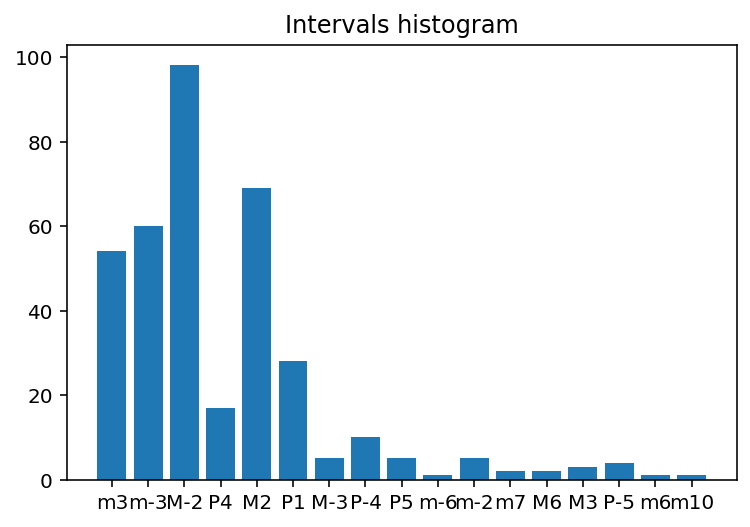

In [65]:
# This cell uses the itvls_vocal dictionary from exercise 2.4

# Import pyplot
import matplotlib.pyplot as plt

# Create the plot
plt.bar(itvls_vocal.keys(), itvls_vocal.values())
plt.title("Intervals histogram")
plt.show()

### Exercise 3. Write your own code

All the exercises in Exercise 3 are parts of one single task: analyzing the intervalic distribution of the instrumental part in our score, and plot a bar chart with intervals organized along the x axis from smaller to larger distance. Each of the following exercises are the required steps for achieving this goal. Therefore, you won't be able to solve one exercise until you solved the previous one.

Expected result at the end of all the exercises in Exercise 3:

<img src="./img/09-3.7-OrderedIntervalsHistogram.png"  style="height:19em; float:left;">

⇒ **Note**: the whole Exercise 3 follows the same logic as the pitch histogram computed earlier in this notebook in the "Introduction to pyplot" section.

### 3.1
First of all, if we want to analyze intervals in the instrumental part, we need to retrieve all the notes from this part. However, since we won't like to consider intervals with a rest between the two notes that form the interval, we will like to retrieve the notes AND rests from the instrumental part.

To avoid any effect of previous coding let's start from scratch. Therefore,

- import music21
- import pyplot
- load the score (you can use the variable `fn` from the second cell of this notebook, so make sure that you run that cell before this one)
- retrieve the instrumental part
- retrieve the notes and rests of the instrumental part
- print the amount of notes and rests retrieved
- optional: to double check the result, open the stream containing the notes and rests of the instrumental in your score editor

Expected result:

    There are 1397 notes and rests in the instrumental part.

In [70]:
# Import music21 and pyplot

from music21 import *

import matplotlib.pyplot as plt

# Load the score (you can use the variable fn from the 2nd cell of this notebook)

s = converter.parse(fn)

# Retrieve the instrumental part

p_instr = s.parts[0]

# Retrieve the notes and rests of the instrumental part

nr_instr = p_instr.flat.notesAndRests.stream()

# Print the amount of notes and rests retrieved
print("The vocal part has {} notes and rests.".format(len(nr_instr.elements)))

# OPTIONAL: open the stream of notes and rests in your score editor
nr_instr.show()

The vocal part has 1397 notes and rests.


### 3.2
Now, let's count the occurrence of each of the intervals present in the instrumental part. Since we don't know a priori which intervals are there, we will use a dictionary for that. Therefore:

- create an empty dictionary. Call it `itvl_count`


- iterate over the indexes of the stream of notes and rests up to the penultimate. For each iteration:
    - retrieve the element in the current index and the one in the next index
    - check if both of them are notes. If so,
    - create an interval with the previous two notes
    - check if the name of the interval is NOT yet among the keys of `itvl_count`. If still not there:
    - add the name of the interval as key of the `itvl_count` dictionary with an initial value of 1. However, if it is already there:
    - update the value of the key corresponding to the interval name by one


- after all the iterations are finished, print the `itvl_count` dictionary

Expected result:

    {'M2': 492, 'm3': 380, 'P5': 52, 'P4': 158, 'P1': 110, 'm6': 30, 'm2': 42, 'M3': 35, 'd5': 8, 'm7': 25, 'P8': 4, 'M6': 3}
    
⇒ **Note**: this exercise follows the same logic as exercises 2.3 and 2.4 in this notebook.

In [74]:
# Create the itvl_count empty dictionary

itvl_count = {}

# Iterate over indexes of notes and rests to the penultimate one. Retrieve elements in current index and
# next one. Check if they are notes. If so, create interval. Check if interval name NOT yet among the keys
# of itvl_count. If so, add interval name as key with value 1. If already there, update the value of the
# key of the interval name by 1


for i in range(len(nr_instr)-1):
    n1 = nr_instr[i]
    n2 = nr_instr[i+1]
    if n1.isNote and n2.isNote:
        itvl = interval.Interval(n1, n2)
        if itvl.name not in itvl_count.keys():
            itvl_count[itvl.name] = 1
        else: 
            itvl_count[itvl.name] += 1


# Print the itvl_count dictionary
print(itvl_count)

{'M2': 492, 'm3': 380, 'P5': 52, 'P4': 158, 'P1': 110, 'm6': 30, 'm2': 42, 'M3': 35, 'd5': 8, 'm7': 25, 'P8': 4, 'M6': 3}


### 3.3
Let's just plot a preliminary bar chart using the keys of the `itvl_count` dictionary as positions in the x axis (horizontal dimension) and the values of the `itvl_count` dictionary as values in the y axis (vertical dimension).

Expected result:

<img src="./img/09-3.3-UnorderedIntervalsHistogram.png"  style="height:19em; float:left;">

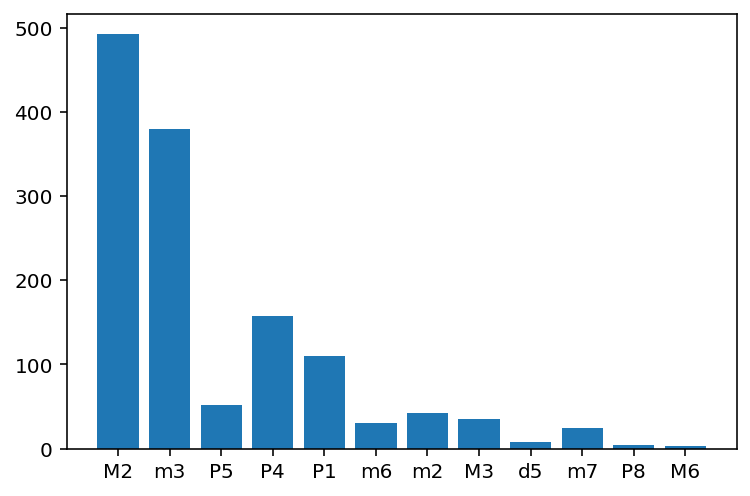

In [75]:
# Initiate the bar chart with the keys of itvl_count and the values of itvl_count as parameters
#itvl_count keys as positions in x axis & itvl_count values as positions in y axis

itvl_keys = ['M2', 'm3', 'P5', 'P4', 'P1', 'm6', 'm2', 'M3', 'd5', 'm7', 'P8', 'M6']

itvl_values = [492, 380, 52, 158, 110, 30, 42, 35, 8, 25, 4, 3]

# Close and display the plot
plt.bar(itvl_keys, itvl_values)
plt.show()

### 3.4
We already have the data that we want to plot and we checked that they are nicely plotted. What we need to do in the next exercises is ordering the intervals along the x axis (horizontal dimension) from the smallest to the largest distance.

If we directly use the `sorted()` function with the keys of the `itvl_count` dictionary, since they are strings, the result will be an alphabetical order. So, to order the intervals in terms of their distance, we can use music21. Luckily, besides creating an interval with two pitches or two notes, we can also create an interval by calling `interval.Interval()` and giving an interval name as input (precisely as the keys of our `itvl_count`). Once we have created the interval, we can retrieve its distance either as semitones or cents. In this case, we can use semitones.

Before using this method for all the keys of the `itvl_count` dictionary, let's test the creation of an interval from the string of an interval name, for example, `m3` (minor third). Print the "nice name" of the interval, and its number of semitones, to check that it worked.

Expected result:

    This interval is a Minor Third
    This interval has 3 semitones.

In [76]:
# Create an interval object calling interval.Interval() and giving 'm3' as parameter. Save the output in a variable

m3_itvl = interval.Interval('m3')

# Print the nice name of the interval

print("This interval is a {}.".format(m3_itvl.niceName))

# Print the number of semitones by calling the .semitones attribute on the variable where you saved the interval object.

print("This interval has {} semitones.".format(m3_itvl.semitones))

This interval is a Minor Third.
This interval has 3 semitones.


### 3.5
So, now we can apply that method to all the keys of the `itvl_count` dictionary. However, in the final plot, we wouldn't like to display number of semitones in the x axis, but the interval names. So, in order to keep a reference between semitones and interval names, we will create a dictionary in which the keys will be the semitones, and their respective values the interval name. Therefore:

- create an empty dictionary. Call it `itvl_semitones`


- iterate over all the keys of the `itvl_count` dictionary. For each iteration:
    - create an interval object calling `interval.Interval` and using the current key as parameter. Save the interval object in a variable
    - call the `.semitones` attribute on the variable where you saved the interval object and save the output in a new variable
    - add the variable where you saved the semitones to the `itvl_semitones` dictionary as a new key, and assign as its value the current key of the iteration (from the `itvl_count` dictionary)
    
    
- after all the iterations are finished, print the `itvl_semitones` dictionary

Expected result:

    {2: 'M2', 3: 'm3', 7: 'P5', 5: 'P4', 0: 'P1', 8: 'm6', 1: 'm2', 4: 'M3', 6: 'd5', 10: 'm7', 12: 'P8', 9: 'M6'}

In [78]:
# Create the empty dictionary itvl_semitones

itvl_semitones = {}

# Iterate over the keys of itvl_count. Call interval.Interval with the current key as parameter and
# save the interval object in a variable. Retrieve its semitones and save it in a variable. Then,
# add the semitones as key of itvl_semitones with the current key of the iteration as value

for i in itvl_count.keys():
    interval_object = interval.Interval(i)
    interval_semiTones = interval_object.semitones
    itvl_semitones[interval_semiTones] = interval_object.name

# Print the itvl_semitones dictionary

print(itvl_semitones)

{2: 'M2', 3: 'm3', 7: 'P5', 5: 'P4', 0: 'P1', 8: 'm6', 1: 'm2', 4: 'M3', 6: 'd5', 10: 'm7', 12: 'P8', 9: 'M6'}


### 3.6
Now we are ready to sort the intervals in terms of their semitones distance. If you remember from the pitch histogram computed in the "Introduction to pyplot" section, we need three lists for plotting our bar chart with ordered positions.

1. a list with the ordered positions in the x axis. This will be an ordered list of the semitones. We can get that by calling the `sorted()` function on the keys of the `itvl_semitones` dictionary. Save the output in a variable called `sorted_semitones`. Print the list.


2. a list with the ordered ticks for the x axis. This will be an ordered list of interval names. We can get that by creating an empty list, called `sorted_itvl`, then iterating over the elements of the `sorted_semitones` list, and for each iteration, calling the current element as key of the `itvl_semitones` dictonary and appending the retrieved value to the `sorted_itvl` list. Print the list.


3. a list with ordered values for the y axis. This will be an ordered list of the values corresponding to each of the ordered interval names in `sorted_itvl`. We can get that by creating an empty list, called `sorted_values`, then iterating over the elements of the `sorted_itvl` list, and for each iteration, calling the current element as key of the `itvl_count` dictonary and appending its value to the `sorted_values` list. Print the list.

Expected result:

    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
    ['P1', 'm2', 'M2', 'm3', 'M3', 'P4', 'd5', 'P5', 'm6', 'M6', 'm7', 'P8']
    [110, 42, 492, 380, 35, 158, 8, 52, 30, 3, 25, 4]

In [79]:
# Call the sorted() function giving the keys of itvl_semitones as parameter, and
# save the output in a variable called sorted_semitones

sorted_semitones = sorted(itvl_semitones.keys())

# Print the list sorted_semitones

print(sorted_semitones)

# Create an empty list called sorted_itvl

sorted_itvl = []

# Iterate over the elements of sorted_semitones. Use the current element in each iteration as key
# of the itvl_semitones dictionary for retrieving its corresponding value. Append that value to
# the sorted_itvl list

for i in sorted_semitones:
    sorted_itvl.append(itvl_semitones[i])

# Print the sorted_itvl list

print(sorted_itvl)

# Create an empty list called sorted_values

sorted_values = []

# Iterate over the elements of sorted_itvl. Use the current element in each iteration as key
# of the itvl_count dictionary for retrieving its corresponding value. Append that value to
# the sorted_values list

for i in sorted_itvl:
    sorted_values.append(itvl_count[i])

# Print the sorted_values list
print(sorted_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
['P1', 'm2', 'M2', 'm3', 'M3', 'P4', 'd5', 'P5', 'm6', 'M6', 'm7', 'P8']
[110, 42, 492, 380, 35, 158, 8, 52, 30, 3, 25, 4]


### 3.7
Now we are ready to plot!

- Initiate the bar chart plot with the `sorted_semitones` and `sorted_values` lists as parameters.
- Define the ticks of the x axis with the `.xticks()` function giving the `sorted_semitones` list as positions and the `sorted_itvl` list as ticks.
- Close and display the plot

Expected result:

<img src="./img/09-3.7-OrderedIntervalsHistogram.png"  style="height:19em; float:left;">

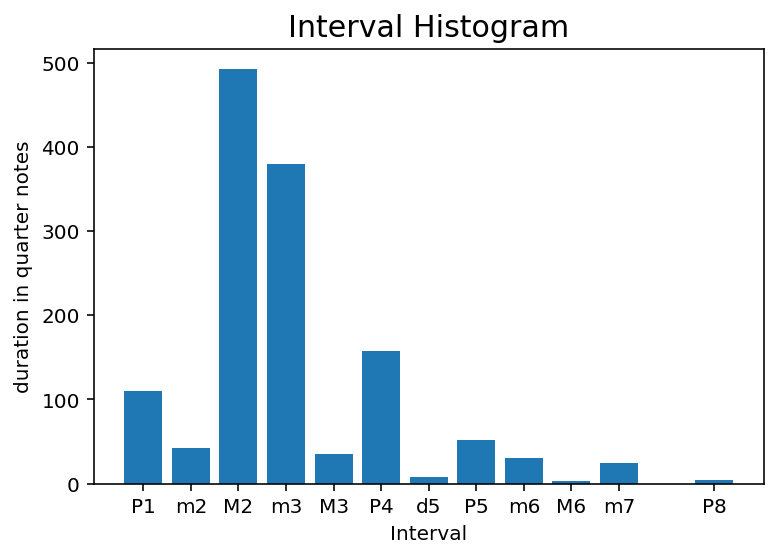

In [92]:
# Initiate the plot with the lists sorted_semitones and sorted_values

plt.bar(sorted_semitones, sorted_values)

# Define xticks with the lists sorted_semitones and sorted_itvl

plt.xticks(sorted_semitones, sorted_itvl)
plt.title("Interval Histogram", size=15)
plt.xlabel("Interval", size=10)
plt.ylabel("duration in quarter notes", size=10)

#What is the mistake here? Tried several ways, looked at stakoverflow and codespeedy, but it doesn't work to change the color of the bars
#barlist = plt.bar(['P1', 'm2', 'M2', 'm3', 'P4', 'd5', 'P5', 'm6', 'M6', 'm7', 'P8'], [100, 200, 300, 400, 500])
#barlist[1].set_color('green')

# Close and display the plot
plt.show()

⇒ **Optional**: could you add a title to the previous plot, and labels to the x and y axis? You can even want to play with different colors for the bars, font sizes for the title, labels and ticks, and many more other features. Think of anything you would like to try out, and try to find it in the [**pyplot** documentation pages](https://matplotlib.org/contents.html).

⇒ **Challenge**: could you plot a similar interval histogram as the one we did in Exercise 3, but considering the direction of the intervals?